<a href="https://colab.research.google.com/github/arputtick/dataism/blob/master/assignments/Week%204/Week4_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx

# Linear Threshold Model - Competing Influences

In this assignment, we'll look at extending the linear threshold model to a situation with two competing influences. This was case in the USC study, which modeled both the "bad influence" from drug-users and "good influence" from non-drug-usuers. (It'd be interesting to know where they draww the line between users and non-usuers).

We'll use the same six-person social network from last week's example.

|Person i|Person j|
|---|---|
|1|2|
|1|3|
|1|5|
|2|1|
|3|2|
|4|2|
|4|3|
|5|3|
|5|4|
|6|4|
|6|5|

Again, we assume that each of a person's influencers influences them equally and that everyone has a threshold value of 0.5


We'll start by assuming that Persons 1, 3 and 6 want Trump to be elected and Persons 2, 4 and 5 want him out:

In [ ]:
vote_trump = [1,3,6]
no_trump = [2,4,5]

Now let's set up the model in exactly the same way as last week.

In [ ]:
# create directed graph object and name it 'social_net_graph'
social_net_graph = nx.DiGraph()

In [ ]:
# add edges to the graph
social_net_graph.add_edges_from([(1,2), (1,3), (1,5), (2,1), (3,2), (4,2), (4,3), (5,3),\
                                (5,4), (6,4), (6,5)])

In [ ]:
# find the positions of nodes in the graph, as (x,y)-coordinates
pos = nx.spring_layout(social_net_graph) 

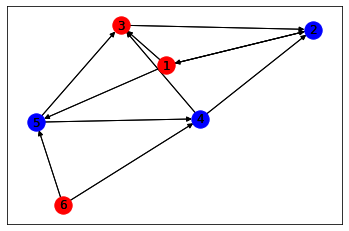

In [ ]:
# draw the graph with vote_trump as red and no_trump as blue
nx.draw_networkx(social_net_graph, pos, 
                    nodelist = vote_trump,
                    node_color = 'r')

nx.draw_networkx(social_net_graph, pos, 
                    nodelist = no_trump,
                    node_color = 'b')

In [ ]:
# Compute the number of influencers for each person simultaneously:
num_influencers = social_net_graph.in_degree()

## Compute the influence weights and label the edges with them under the
## attribute name 'influence.'

for edge in social_net_graph.edges:
    social_net_graph.edges[edge[0],edge[1]]['influence'] = 1 / num_influencers[edge[1]]

In [ ]:
# Give every person a threshold value of 0.5
for node in social_net_graph.nodes:
    social_net_graph.nodes[node]['threshold'] = 0.5

In [ ]:
new_vote_trump = []
new_no_trump = []
for node in social_net_graph.nodes:
    if node in vote_trump:
        ### YOUR CODE HERE ###

        continue # delete this and add your code.

        ######################

                

    if node in no_trump:
        influence_sum = 0
        for neighbor in social_net_graph.predecessors(node):

            if neighbor in vote_trump:
                influence_sum += social_net_graph.edges[neighbor,node]['influence']

            if influence_sum > social_net_graph.nodes[node]['threshold']:
                new_vote_trump.append(node)
               
## Add the list of new Trump supporters to the vote_trump list.
# In Python, summing two lists just concatenates them.
# For example, [1,2] + [3,4] = [1,2,3,4].
vote_trump += new_vote_trump

## Subtract the list of new anti-Trumpers from the vote_trump list.
# Unfortunately, subtracting a sublist from a list is not as easy.
# The following code will do it in this case. We convert the list to sets,
# subtract, and then reconvert to a list. A set is sort of like an unordered list.
vote_trump = list(set(vote_trump)-set(new_no_trump)) 

## Do the same fore the no_trump list
no_trump += new_no_trump
no_trump = list(set(no_trump)-set(new_vote_trump)) 

Check new list of pro-Trumpers:

In [ ]:
vote_trump

Make sure it's completementary to the list of anti-Trumpers:

In [ ]:
no_trump

Draw the results

In [ ]:
# draw the graph with vote_trump as red and no_trump as blue
nx.draw_networkx(social_net_graph, pos, 
                    nodelist = vote_trump,
                    node_color = 'r')

nx.draw_networkx(social_net_graph, pos, 
                    nodelist = no_trump,
                    node_color = 'b')

## Iterate
Now try repeating the process to see what happens.